In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt

Import the dictionary of ASIN IDs as keys to product titles as values:

In [2]:
file_name = "ID_map-11-18"
picklefile = open(file_name,'rb')
ID_map = pickle.load(picklefile)

# Function for getting the name based on an ASIN ID:
def get_product_name(ASIN):
    if ASIN in ID_map:
        return ID_map[ASIN]
    else:
        print("There was an error with %s", ASIN)

Import adjacency matrix saved as copurchases pickle file

In [3]:
# open the file for writing
file_name = "copurchases-11-20"
picklefile = open(file_name,'rb')
copurchases = pickle.load(picklefile)

Visualize co-purchases adjacency matrix

In [6]:
G_copurchases = nx.DiGraph()
G_copurchases.add_nodes_from(copurchases.keys())
for k, v in copurchases.items():
    for t in v:
        if not G_copurchases.has_edge(k, t) and not G_copurchases.has_edge(t, k):
            G_copurchases.add_edges_from(([(k, t)]))

In [7]:
print(nx.info(G_copurchases))

Name: 
Type: DiGraph
Number of nodes: 721341
Number of edges: 1545228
Average in degree:   2.1422
Average out degree:   2.1422


In [8]:
print(len(copurchases))

548551


In [10]:
nx.draw_networkx_nodes(G_copurchases, pos=nx.spring_layout(G_copurchases))

MemoryError: 

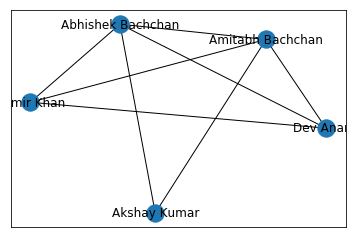

In [7]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')
nx.spring_layout(G_symmetric)
nx.draw_networkx(G_symmetric)